<a href="https://colab.research.google.com/github/santiagorg2401/SANPR/blob/main/SANPR_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Secure Automatic Number-Plate Recognition: segmentation.

Detect cars and license plates from an image.

## Check input images

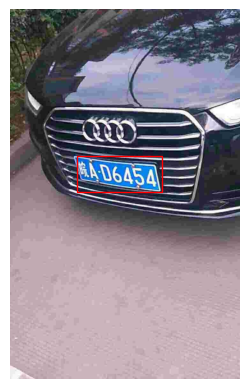

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the image
img = plt.imread("LicensePlates/train/images/ccpd_1539.jpg")

# Load bounding box coordinates from CSV
lbl = pd.read_csv("LicensePlates/train/labels/ccpd_1539.txt", delimiter=" ", header=None).to_numpy()[0]

# Extract bounding box coordinates
_, center_x, center_y, width, height = lbl

# Image properties
img_heigth, img_width, _ = img.shape

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Calculate bounding box parameters
w, h = width * img_width, height * img_heigth
xy = (center_x * img_width - w/2, center_y * img_heigth - h/2)


# Plot the bounding box
rect = patches.Rectangle(xy, w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Turn off axis labels
ax.axis(False)

# Show the plot
plt.show()

In [2]:
img.shape

(1160, 720, 3)

## Install YOLO V5 Ultralytics.

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt
!pip install -q roboflow

## Fine-tune on custom licence plate augmented dataset.
Using modified [CCPD (Chinese City Parking Dataset, ECCV)](https://github.com/detectRecog/CCPD) by Xu, Zhenbo and Yang, Wei and Meng, Ajin and Lu, Nanxue and Huang, Huan

@inproceedings{xu2018towards,
  title={Towards End-to-End License Plate Detection and Recognition: A Large Dataset and Baseline},
  author={Xu, Zhenbo and Yang, Wei and Meng, Ajin and Lu, Nanxue and Huang, Huan},
  booktitle={Proceedings of the European Conference on Computer Vision (ECCV)},
  pages={255--271},
  year

In [3]:
import torch
import os
from IPython.display import Image, clear_output  # to display images
import matplotlib.pyplot as plt


print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu117 (NVIDIA GeForce RTX 3060 Laptop GPU)


In [4]:
!python yolov5/train.py --img 640\
               --batch 32\
               --epochs 100\
               --data LicensePlates/data.yaml\
               --weights yolov5s.pt\
              #  --workers {WORKERS}\
               --project SANPR\
              #  --name {RUN_NAME}\
               --exist-ok

train: weights=yolov5s.pt, cfg=, data=LicensePlates/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 7 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-209-g493981c Python-3.9.17 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5938MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls

## Make an inference

In [10]:
# Try model on a different image
!python yolov5/detect.py --source /home/santiagorg2401/Downloads/test.jpg --weights /home/santiagorg2401/SANPR-TF/yolov5/runs/train/exp/weights/best.pt --conf 0.25 --name yolo_road_det

detect: weights=['/home/santiagorg2401/SANPR-TF/yolov5/runs/train/exp/weights/best.pt'], source=/home/santiagorg2401/Downloads/test.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=yolo_road_det, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-209-g493981c Python-3.9.17 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5938MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/santiagorg2401/Downloads/test.jpg: 320x640 1 license, 40.6ms
Speed: 0.4ms pre-process, 40.6ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/yolo_road_det6


(-0.5, 1099.5, 549.5, -0.5)

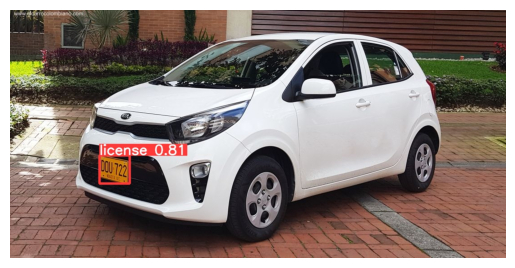

In [12]:
# Load the image
img = plt.imread("yolov5/runs/detect/yolo_road_det6/test.jpg")
plt.imshow(img)
plt.axis(False)